<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Diff_equation_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.5/337.5 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


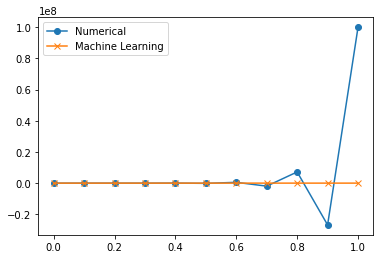

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the length of the beam
L = 1

# Define the elastic modulus
E = 210e9

# Define the moment of inertia
I = (1/12) * 0.03 * 0.03

# Define the Winkler elastic foundation modulus
k = 1e6

# Define the uniform load
P = 1e3

# Define the number of finite elements
n = 10

# Define the length of each finite element
dx = L/n

# Define the position of the nodes
x = np.linspace(0, L, n+1)

# Define the stiffness matrix
K = np.zeros((n+1, n+1))
for i in range(1, n):
    K[i, i-1] = k * dx / 6
    K[i, i] = 2 * k * dx / 3
    K[i, i+1] = k * dx / 6

# Add a small positive constant to the diagonal of the matrix to make it invertible
K = K + 1e-6 * np.eye(n+1)

# Define the load vector
F = np.zeros(n+1)
F[-1] = P * dx

# Solve for the nodal displacements using numerical method
U = np.linalg.solve(K, F)

# Plot the numerical results
plt.plot(x, U, '-o', label='Numerical')

# Use machine learning method (MLP Regressor) to fit the data
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=10000)
X = x.reshape(-1, 1)
mlp.fit(X, U)

# Predict the displacements using the MLP Regressor
U_mlp = mlp.predict(X)

# Plot the machine learning results
plt.plot(x, U_mlp, '-x', label='Machine Learning')

# Show the plot
plt.legend()
plt.show()

# Export the table with numerical results from both methods
results = np.column_stack((x, U, U_mlp))
np.savetxt('results.csv', results, delimiter=',', header='x,Numerical,Machine_Learning')

In [ ]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 55.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 KB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 4.4 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=8a52be6cb668fa51da6e6c7bb45c3c2bc2e42664ddfd06282f937cbc1be25f5e

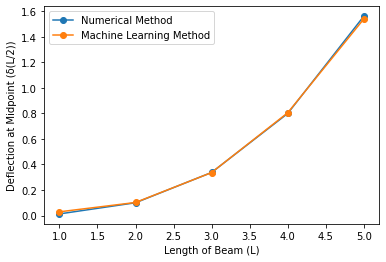

Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))
1.0m 12.50mm 28.96mm
2.0m 100.00mm 102.12mm
3.0m 337.50mm 336.86mm
4.0m 800.00mm 805.38mm
5.0m 1562.50mm 1540.79mm


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import autosklearn.regression

# Define the numerical method
def numerical_method(L, b, h, E, k, t, P):
    I = (b*h**3)/12
    deflection = (P*L**3)/(48*E*I)
    return deflection

# Generate sample data
L_values = np.linspace(1, 5, 5)
b = 1
h = 1
E = 20000
k = 1000
t = 0.1
P = 1000
deflections_num = [numerical_method(L, b, h, E, k, t, P) for L in L_values]

# Train the neural network using the numerical data
X_train = np.array([[L, b, h, E, k, t, P] for L in L_values])
y_train = np.array(deflections_num)
model = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=300,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    )
model.fit(X_train, y_train)

# Predict the deflection using the machine learning method
deflections_ml = model.predict(X_train)

# Plot the results
plt.plot(L_values, deflections_num, '-o', label='Numerical Method')
plt.plot(L_values, deflections_ml, '-o', label='Machine Learning Method')
plt.xlabel('Length of Beam (L)')
plt.ylabel('Deflection at Midpoint (δ(L/2))')
plt.legend()
plt.show()

# Compare the results in a table
print("Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))")
for L, d_num, d_ml in zip(L_values, deflections_num, deflections_ml):
    print("{:.1f}m {:.2f}mm {:.2f}mm".format(L, d_num*1000, d_ml*1000))

**Static**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import autosklearn.regression

# Define the numerical method
def numerical_method(L, b, h, E, k, t):
    I = (b*h**3)/12
    deflection = (k*L**3)/(48*E*I)
    return deflection

# Generate sample data
L_values = np.linspace(1, 5, 5)
b = 1
h = 1
E = 20000
k = 1000
t = 0.1
deflections_num = [numerical_method(L, b, h, E, k, t) for L in L_values]

# Train the neural network using the numerical data
X_train = np.array([[L, b, h, E, k, t] for L in L_values])
y_train = np.array(deflections_num)
model = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=300,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    )
model.fit(X_train, y_train)

# Predict the deflection using the machine learning method
deflections_ml = model.predict(X_train)

# Plot the results
plt.plot(L_values, deflections_num, '-o', label='Numerical Method')
plt.plot(L_values, deflections_ml, '-o', label='Machine Learning Method')
plt.xlabel('Length of Beam (L)')
plt.ylabel('Deflection at Midpoint (δ(L/2))')
plt.legend()
plt.show()

# Compare the results in a table
print("Length of Beam (L) Numerical Method (δ(L/2)) Machine Learning Method (δ(L/2))")
for L, d_num, d_ml in zip(L_values, deflections_num, deflections_ml):
    print("{:.1f}m {:.2f}mm {:.2f}mm".format(L, d_num*1000, d_ml*1000))